In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy.stats as stats 
from scipy.stats import chi2_contingency

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm 

In [6]:
data=pd.read_csv('C:\\Users\\soyam\\Desktop\\insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
#By using info function, we will take a look at our types of data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
#The describe() function provides the statistical information about the numeric variables.
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
#example 1
##In this first example, we will show how to prove (or disprove),
#with statistical evidence, that the BMI of females is different from that of males.
#choose a sample test statistic
##Let 𝜇1 be the population mean for BMI of males and 𝜇2 be the the population mean for BMI of females
#define the hypothesis to be tested
#Null->u1-u2=0 that means that both bmi is the same
#alternative->u1-u2 !=0 that means both the bmi are different
#We will choose 5% significance level. Therefore, our  
#α=0.05
#Since we have a 2-tailed test, we have to divide alpha by 2, which gives us 0.025. 
#So, if the calculated p-value is less than alpha, we will reject the null hypothesis


In [10]:
#evaluation and interpretation
#First, let's get all observations for females and males by using the loc() function.
female=data.loc[data.sex=="female"]
male=data.loc[data.sex=="male"]


In [11]:
#selecting bmi for both
f_bmi=female.bmi
m_bmi=male.bmi

<Axes: xlabel='bmi', ylabel='Density'>

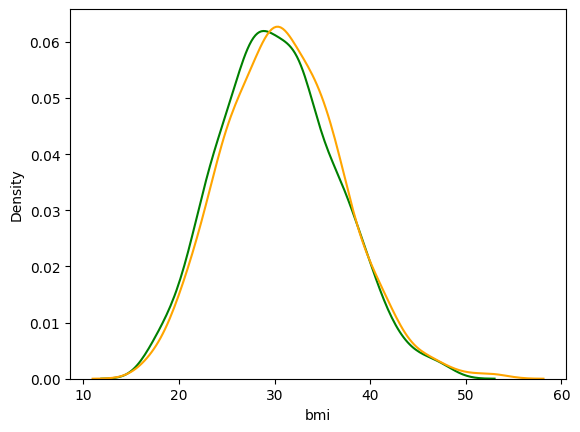

In [13]:
#Now, we will plot the distribution of 'bmi' values for females and males using seaborn's distplot() function.
sns.distplot(f_bmi,color="green",hist=False)
sns.distplot(m_bmi,color="orange",hist=False)

In [14]:
#From the graph, we already see that the two distributions are very similar.
#Now, let's calculate the mean values for females and males bmi.
female.bmi.mean()
male.bmi.mean()

30.943128698224854

In [18]:
#Next, we will obtain our statistics, t-value and p-value. 
#We will use scipy.stats library and ttest_ind() function to calculate these parameters.
alpha=0.05
t_value1, p_value1 =stats.ttest_ind(m_bmi,f_bmi)
print(t_value1,p_value1)

1.696752635752224 0.08997637178984934


In [22]:
#Next, although optional, it is useful to print 'if/else' statements to make our conclusions about the the hypothesis
if p_value1<alpha:
    print("null hypothesis rejected")
else:
    print("fail to reject null hypothesis")
   
    

fail to reject null hypothesis


In [23]:
#so there is no difference between male and female bmi

In [ ]:
#Example 2
#In this example, we would like to prove (or disprove) 
#that the medical claims made by the people who smoke are greater than those who don't.
#We will compare the mean values (𝜇) of population of people who smoke and those who do not smoke. 
#First, we need to calculate the mean values of smoking and non smoking populations.